In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("Feature names:", feature_names)
print("Target names:", target_names)

df = pd.DataFrame(X, columns=feature_names)
df['species'] = pd.Categorical.from_codes(y, target_names)
print("\nFirst 5 rows of the dataset:")
print(df.head())

Features (X) shape: (150, 4)
Target (y) shape: (150,)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


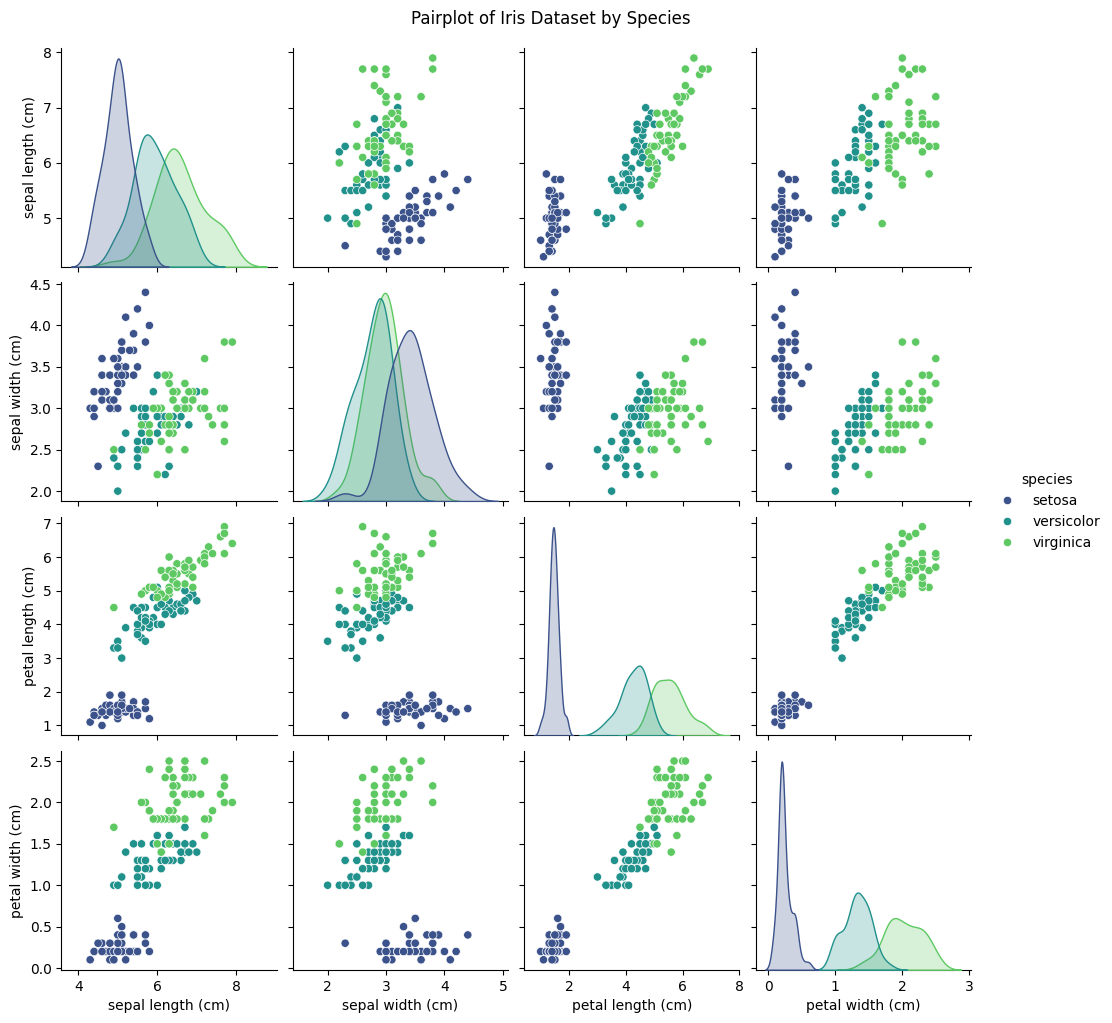


Dataset Description:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [8]:
sns.pairplot(df, hue='species', palette='viridis')
plt.suptitle("Pairplot of Iris Dataset by Species", y=1.02)
plt.show()

print("\nDataset Description:")
print(df.describe())

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # stratify helps maintain class distribution

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 105 samples
Testing set size: 45 samples


In [10]:
model = LogisticRegression(max_iter=200, solver='lbfgs', multi_class='auto')

print("\nTraining the Logistic Regression model...")
model.fit(X_train, y_train)
print("Model training complete.")


Training the Logistic Regression model...
Model training complete.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [11]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

print("\nFirst 5 true labels (test):", y_test[:5])
print("First 5 predicted labels:", y_pred[:5])
print("First 5 predicted probabilities (first class):", y_pred_proba[:5, 0])


First 5 true labels (test): [2 1 2 1 2]
First 5 predicted labels: [2 1 1 1 2]
First 5 predicted probabilities (first class): [1.89009595e-06 4.52959877e-03 9.23750236e-04 5.07028245e-03
 1.69317691e-03]



Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



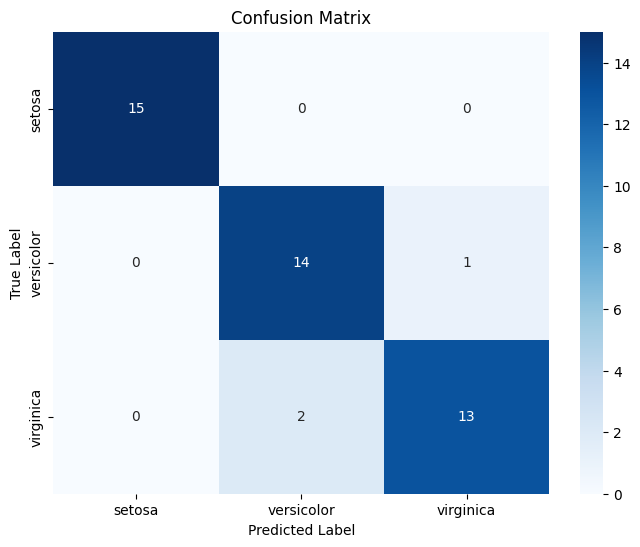


Interpretation of Confusion Matrix:
Rows represent true classes, columns represent predicted classes.
Diagonal values are correctly classified samples.


In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("\nInterpretation of Confusion Matrix:")
print("Rows represent true classes, columns represent predicted classes.")
print("Diagonal values are correctly classified samples.")